In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
data = pd.read_csv (r'C:\Users\Megha\OneDrive\Desktop\Wine_clust .csv')

In [5]:
#REQUIRED STEPS
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [10]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Ash_Alcanity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_Intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

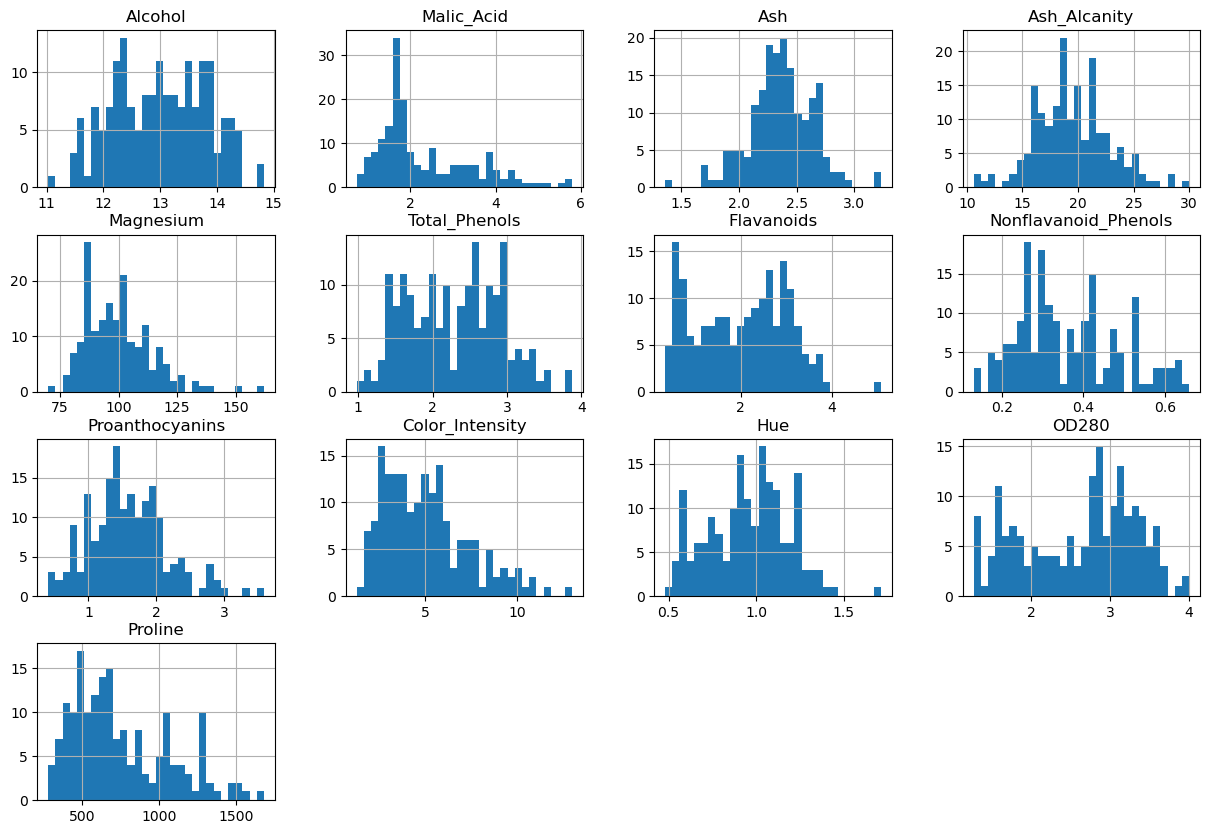

In [13]:
#VIEWING DISTRIBUTION USING HISTOGRAM
data.hist(bins=30, figsize=(15, 10))

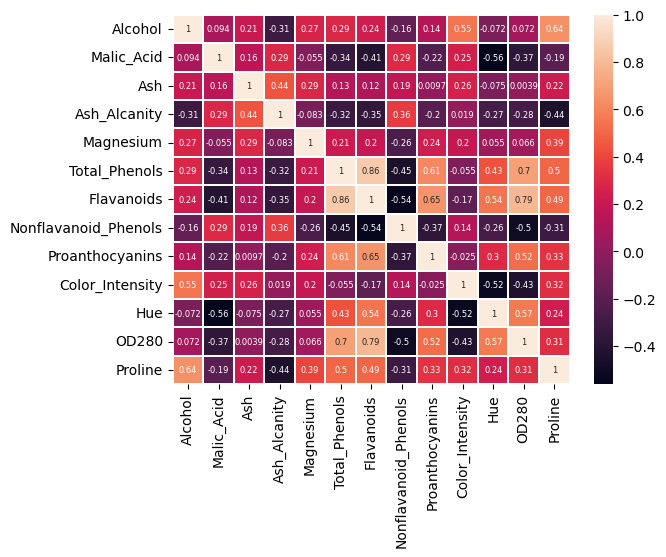

In [14]:
#CORRELATION MATRIX
sns.heatmap(data.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})
plt.show()

In [16]:
#DROPPING IRRELEVANT FEATURES
X = data[['Alcohol','Malic_Acid','Ash',"Ash_Alcanity","Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols","Proanthocyanins","Color_Intensity","Hue","OD280","Proline"]]
df= X.drop(['Malic_Acid','Ash',"Ash_Alcanity","Magnesium","Proanthocyanins","Nonflavanoid_Phenols"],axis=1)
df

,Alcohol,Total_Phenols,Flavanoids,Color_Intensity,Hue,OD280,Proline
0,14.23,2.80,3.06,5.64,1.04,3.92,1065
1,13.20,2.65,2.76,4.38,1.05,3.40,1050
2,13.16,2.80,3.24,5.68,1.03,3.17,1185
3,14.37,3.85,3.49,7.80,0.86,3.45,1480
4,13.24,2.80,2.69,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...
173,13.71,1.68,0.61,7.70,0.64,1.74,740
174,13.40,1.80,0.75,7.30,0.70,1.56,750
175,13.27,1.59,0.69,10.20,0.59,1.56,835
176,13.17,1.65,0.68,9.30,0.60,1.62,840


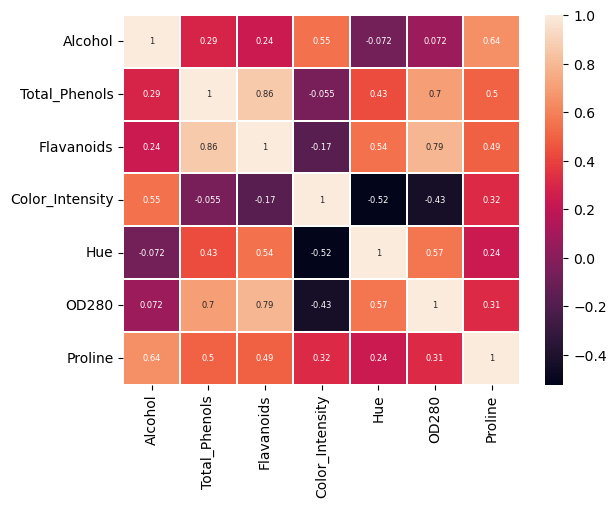

In [17]:
#CORRELATION MATRIX AFTER DROPPING
sns.heatmap(df.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})
plt.show()

In [18]:
#STANDARD SCALING
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
features_scaled = sscaler.fit_transform(data)
features_scaled = pd.DataFrame(features_scaled)

In [19]:
features_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [23]:
#KMeans CLUSTERING
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=20)
    km.fit(X)
    css = km.inertia_
    print('Clusters=',i," wcss= ",css)
    wcss.append(css)

C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 1  wcss=  17592296.383508474


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 2  wcss=  4543749.614531861


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 3  wcss=  2370689.686782968


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 4  wcss=  1331903.0622637183


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 5  wcss=  916379.1871539169


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 6  wcss=  647326.0020260847


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 7  wcss=  412137.50910045847


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 8  wcss=  323211.55263465445


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 9  wcss=  270954.92924153747


C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters= 10  wcss=  217887.378560333


In [24]:
wcss

[17592296.383508474,
 4543749.614531861,
 2370689.686782968,
 1331903.0622637183,
 916379.1871539169,
 647326.0020260847,
 412137.50910045847,
 323211.55263465445,
 270954.92924153747,
 217887.378560333]

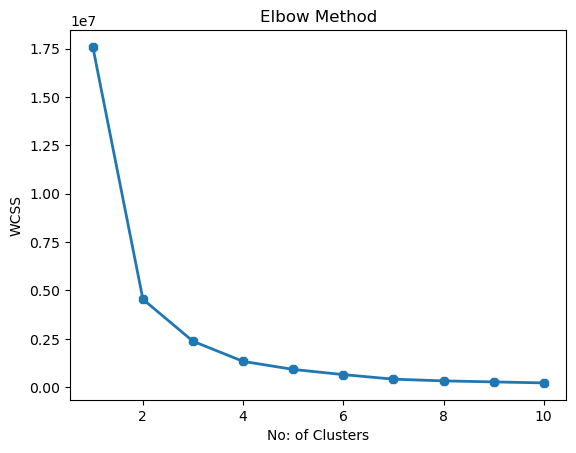

In [26]:
plt.plot(range(1, 11), wcss, linewidth=2, marker ="8")
plt.title('Elbow Method')
plt.xlabel("No: of Clusters")
plt.ylabel("WCSS")
plt.show()

In [27]:
#KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters,init='k-means++',n_init=10,max_iter=300,random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)
data['clusters'] = cluster_labels

C:\Users\Athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559],
       [ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713]])

In [34]:
from sklearn.metrics import silhouette_score
sil_km =  silhouette_score(X,cluster_labels)
sil_km

0.20483529599528413

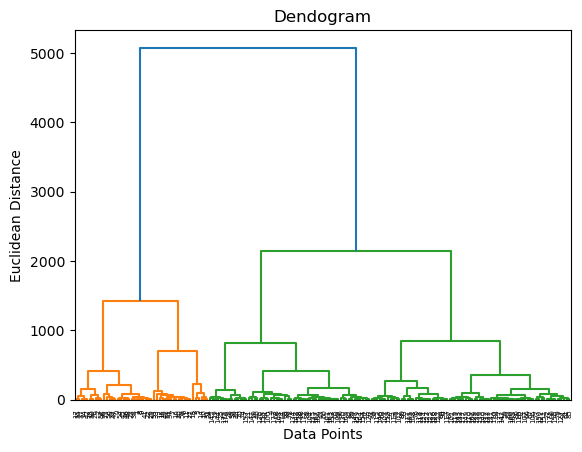

In [36]:
#AGGLOMERATIVE CLUSTERING
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
ahc = AgglomerativeClustering(n_clusters =2, metric =  'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(data)

In [39]:
y_ahc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [40]:
from sklearn.metrics import silhouette_score
sil_ahc =  silhouette_score(data,y_ahc)
sil_ahc

0.6587249349923335

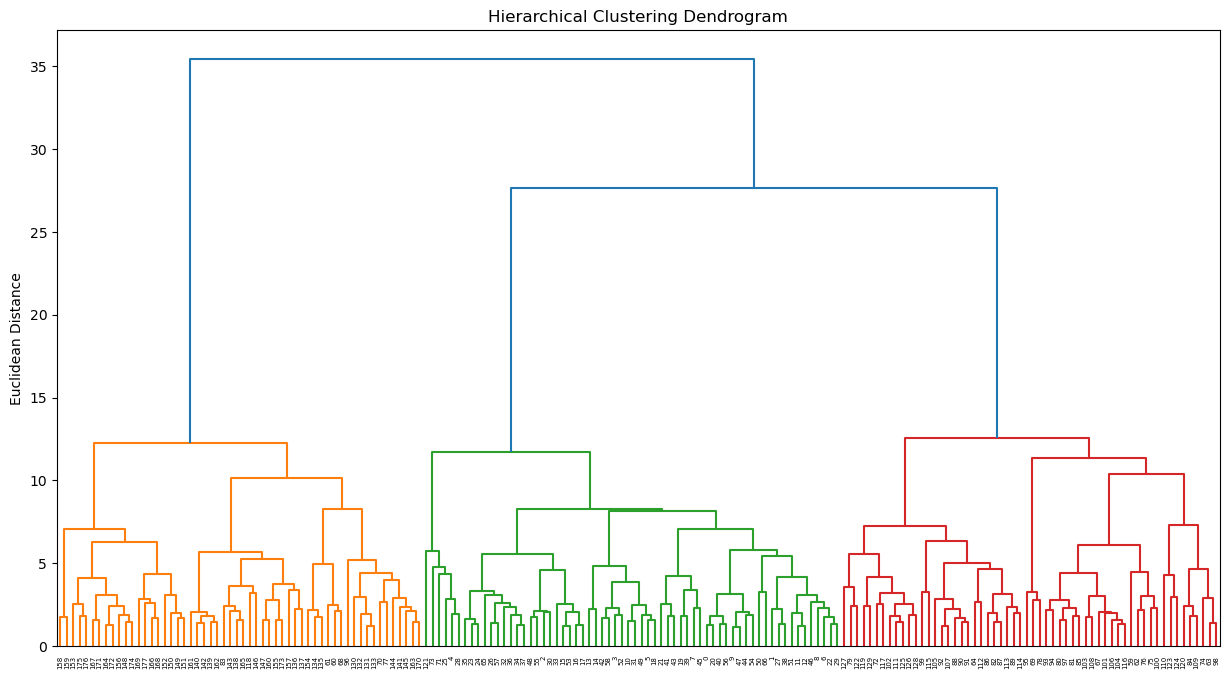

In [41]:
#HIERARCHIAL CLUSTERING
Z = sch.linkage(features_scaled,  method='ward')

plt.figure(figsize=(15, 8))
sch.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')

plt.ylabel('Euclidean Distance')
plt.show()

In [42]:
#DB SCAN CLUSTERING
from sklearn.datasets import make_blobs 
from sklearn.neighbors import NearestNeighbors

In [44]:
neigh = NearestNeighbors()
nbrs = neigh.fit(X)
distance,indices = nbrs.kneighbors(X)

In [45]:
distance

array([[  0.        ,  10.3928052 ,  22.34074753,  24.76023223,
         25.09466278],
       [  0.        ,   6.78638343,   7.83291772,  13.14076482,
         16.01121794],
       [  0.        ,  12.2969915 ,  13.16761937,  36.71057341,
         37.15471975],
       [  0.        ,  30.09196903,  31.15941752,  35.80962161,
         68.07646363],
       [  0.        ,  17.72868015,  20.77652521,  22.42155882,
         24.14925879],
       [  0.        ,  30.09196903,  60.48524365,  65.39770944,
         75.09062658],
       [  0.        ,   6.23935093,  10.34467496,  10.72270022,
         13.38382232],
       [  0.        ,  15.3305512 ,  16.63357147,  17.67303596,
         22.97238995],
       [  0.        ,   3.27007645,   6.78638343,  10.3394584 ,
         11.292161  ],
       [  0.        ,   3.27007645,   7.83291772,  10.54944548,
         11.03619047],
       [  0.        ,   5.41997232,  31.15941752,  37.65407017,
         60.48524365],
       [  0.        ,   5.29867908,   9.811

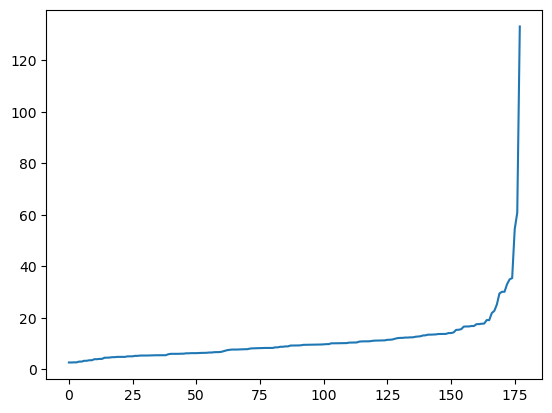

In [47]:
distances = np.sort(distance,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [48]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=35,min_samples=3)
clustering.fit(X)

DBSCAN(eps=35, min_samples=3)

In [49]:
clusters = clustering.labels_
len(set(clusters))

7

In [50]:
silhouette_score(X,clusters)

0.45067067652135456

In [52]:
from sklearn.decomposition import PCA

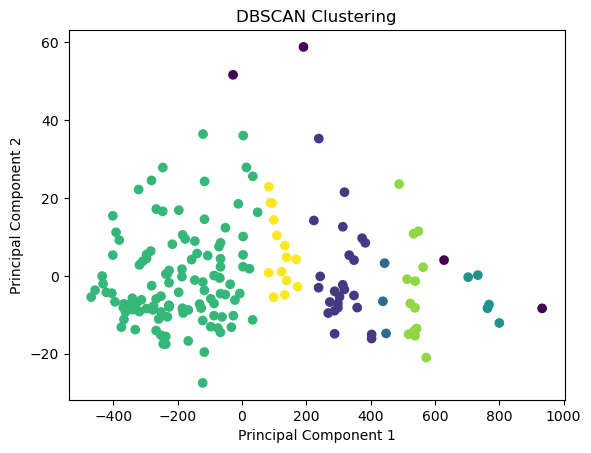

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()